In [18]:
#importing modules
import keras
from keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPooling2D,TimeDistributed,LSTM
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np 
import os
from IPython.display import Audio
import pandas as pd 
import tensorflow as tf
from glob import glob
import IPython
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#loading into memory 
zero=glob("../input/train/audio/zero" + '/*.wav')
one=glob("../input/train/audio/one" + '/*.wav')
two=glob("../input/train/audio/two" + '/*.wav')
three=glob("../input/train/audio/three" + '/*.wav')
four=glob("../input/train/audio/four" + '/*.wav')
five=glob("../input/train/audio/five" + '/*.wav')
six=glob("../input/train/audio/six" + '/*.wav')
seven=glob("../input/train/audio/seven" + '/*.wav')
eight=glob("../input/train/audio/eight" + '/*.wav')
nine=glob("../input/train/audio/nine" + '/*.wav')

In [3]:
#labelling
one1=[]
for i in range(0,len(zero)):
    one1.append((zero[i],0))
for i in range(0,len(one)):
    one1.append((one[i],1))
for i in range(0,len(two)):
    one1.append((two[i],2))
for i in range(0,len(three)):
    one1.append((three[i],3))
for i in range(0,len(four)):
    one1.append((four[i],4))
for i in range(0,len(five)):
    one1.append((five[i],5))
for i in range(0,len(six)):
    one1.append((six[i],6))
for i in range(0,len(seven)):
    one1.append((seven[i],7))
for i in range(0,len(eight)):
    one1.append((eight[i],8))
for i in range(0,len(nine)):
    one1.append((nine[i],9))

In [4]:
#preprocessing

D1=[]
dataframe=pd.DataFrame(one1,columns=["a","b"])
for row in range(0,len(dataframe)):
        y,sr = librosa.load(dataframe["a"][row],duration=1)
        ps = librosa.feature.melspectrogram(y=y,sr=sr)
        ps=librosa.util.fix_length(ps,44)
        D1.append((ps,dataframe["b"][row]))

In [5]:
#reshaping data
df2=pd.DataFrame(D1,columns=["ab","bc"])
df2=df2.sample(frac=1)
train=df2[:14000]
valid=df2[14000:17500]
test=df2[17500:23666]
train_x=train["ab"].values
test_x=test["ab"].values
valid_x=valid["ab"].values
train_x = np.array([x.reshape( (128, 44) ) for x in train_x])
train_y=train["bc"].values
test_x = np.array([x.reshape( (128, 44) ) for x in test_x])
test_y=test["bc"].values
valid_x = np.array([x.reshape( (128, 44) ) for x in valid_x])
valid_y=valid["bc"].values

In [6]:
#model
model=Sequential()
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(512,activation="relu")))
model.add(TimeDistributed(Dense(256,activation="relu")))
model.add(TimeDistributed(Dense(128,activation="relu")))
model.add(TimeDistributed(Dense(64,activation="relu")))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [7]:
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

model.fit(
    x=train_x, 
    y=train_y,
    epochs=16,
    batch_size=128,validation_data=(valid_x,valid_y))
score = model.evaluate(
    x=test_x,
    y=test_y)

print('Test loss:', score[0])
print('Test accuray:', score[1])
model.save('D:\\my_modelsounds.h5')

Train on 14000 samples, validate on 3500 samples
Epoch 1/16
14000/14000 [==============================] - 81s 6ms/step - loss: 1.4747 - acc: 0.4727 - val_loss: 1.0238 - val_acc: 0.6380
Epoch 2/16
14000/14000 [==============================] - 79s 6ms/step - loss: 0.9139 - acc: 0.6812 - val_loss: 0.7713 - val_acc: 0.7394
Epoch 3/16
14000/14000 [==============================] - 78s 6ms/step - loss: 0.7136 - acc: 0.7543 - val_loss: 0.6653 - val_acc: 0.7743
Epoch 4/16
14000/14000 [==============================] - 78s 6ms/step - loss: 0.5901 - acc: 0.7950 - val_loss: 0.6518 - val_acc: 0.7766
Epoch 5/16
14000/14000 [==============================] - 77s 5ms/step - loss: 0.5080 - acc: 0.8244 - val_loss: 0.5562 - val_acc: 0.8126
Epoch 6/16
14000/14000 [==============================] - 77s 5ms/step - loss: 0.4414 - acc: 0.8448 - val_loss: 0.5417 - val_acc: 0.8229
Epoch 7/16
14000/14000 [==============================] - 74s 5ms/step - loss: 0.3987 - acc: 0.8625 - val_loss: 0.5012 - val_acc:

In [19]:
#intitution for number 2
sample="../input/train/audio/two/df1d5024_nohash_1.wav"
y,sr = librosa.load(sample,duration=1)
ps = librosa.feature.melspectrogram(y=y,sr=sr)
ps=librosa.util.fix_length(ps,44)
ps=np.reshape(ps,(1,128,44))
Audio(y,filename=sample)



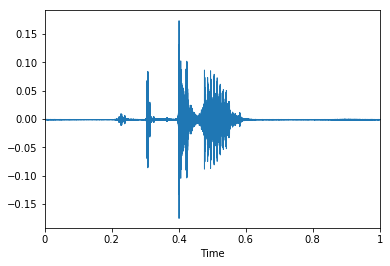

In [20]:
#waveplot
librosa.display.waveplot(y, sr=sr)

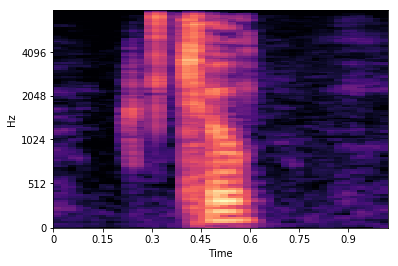

In [21]:
#mel filter
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,
                         x_axis='time')

In [22]:
#probabilities
l=model.predict(ps)
print(l)

[[3.1348187e-05 5.3179457e-07 9.9229890e-01 7.4895895e-03 7.4862939e-05
  5.3069107e-07 8.3013574e-06 1.1614914e-05 8.3274339e-05 9.7180282e-07]]


In [23]:
#class label
predict = np.array(l)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[2]